In [1]:
import numpy as np
import matplotlib.pyplot as plt




In [2]:
def GSMF(mass,z):
    [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11] = \
        [10.55, 0.00, -0.16, 0.12, -1.45, -0.08, -2.43, -0.17, -0.08, -2.94, -0.22]
        
    Mstar = a1 + a2*z
    alpha1 = a3 + a4*z
    alpha2 = a5 + a6*z
    log_phi1 = a7 + a8*z + a9*z*z
    log_phi2 = a10 + a11*z
    
    phi_star1 = 10**log_phi1
    phi_star2 = 10**log_phi2
    
    #print(Mstar,alpha1,alpha2,phi_star1,phi_star2)


    # mass must be in log scale 
    phi_M = np.log(10)*np.exp(-10**(mass-Mstar))*10**(mass-Mstar)*\
            (phi_star1*10**((mass-Mstar)*alpha1)+phi_star2*10**((mass-Mstar)*alpha2))

    return phi_M
    


In [3]:
gal_mass = np.linspace(6,12,100)

#print(gal_mass)


z_here = 0.1


number = GSMF(gal_mass, z_here)

print(number)


[3.04863199e-01 2.85986746e-01 2.68278949e-01 2.51667449e-01
 2.36084364e-01 2.21466016e-01 2.07752669e-01 1.94888286e-01
 1.82820298e-01 1.71499392e-01 1.60879307e-01 1.50916648e-01
 1.41570705e-01 1.32803290e-01 1.24578577e-01 1.16862962e-01
 1.09624918e-01 1.02834874e-01 9.64650878e-02 9.04895361e-02
 8.48838080e-02 7.96250048e-02 7.46916468e-02 7.00635858e-02
 6.57219225e-02 6.16489302e-02 5.78279822e-02 5.42434842e-02
 5.08808108e-02 4.77262466e-02 4.47669298e-02 4.19908007e-02
 3.93865528e-02 3.69435872e-02 3.46519695e-02 3.25023908e-02
 3.04861295e-02 2.85950172e-02 2.68214060e-02 2.51581384e-02
 2.35985190e-02 2.21362886e-02 2.07655995e-02 1.94809933e-02
 1.82773798e-02 1.71500174e-02 1.60944950e-02 1.51067152e-02
 1.41828780e-02 1.33194662e-02 1.25132300e-02 1.17611734e-02
 1.10605391e-02 1.04087934e-02 9.80360968e-03 9.24285016e-03
 8.72454440e-03 8.24686416e-03 7.80809316e-03 7.40659027e-03
 7.04074474e-03 6.70892187e-03 6.40939771e-03 6.14028155e-03
 5.89942608e-03 5.684325

0
1
2
3
4
8


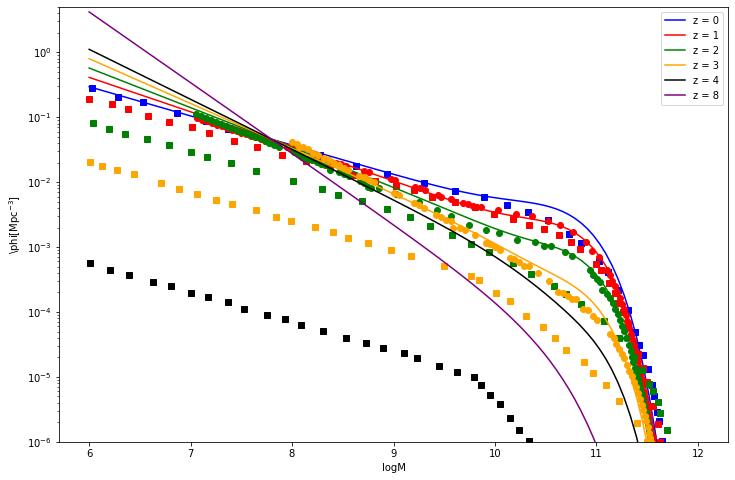

In [20]:
plt.figure(figsize=(12,8))

z_array = [0, 1, 2, 3, 4, 8]

color_array = ['blue', 'red', 'green', 'orange', 'black', 'purple']

for i in range(len(z_array)):

    if (z_array[i] == 0) or (z_array[i] == 1) or \
            (z_array[i] == 2) or (z_array[i] == 3) or (z_array[i] == 4):
        [mass_Chru, phi_Chru] = np.loadtxt('../Chruslinska2019_GSMF/Chruslinska2019_GSMF__'+\
                                       str(z_array[i])+'.csv', delimiter = ',', unpack = True
                                      )
    
        plt.plot(mass_Chru, 10**phi_Chru, color = color_array[i], marker = 's', linewidth = 0)
    
    plt.plot(gal_mass, GSMF(gal_mass,z_array[i]), label = 'z = '+str(z_array[i]), color = color_array[i])
    print(z_array[i])

    if (z_array[i] == 1) or (z_array[i] == 2) or (z_array[i] == 3):
        [mass_Mc, phi_Mc] = np.loadtxt('McLeod_GSMF_z'+\
                                       str(z_array[i])+'.csv', delimiter = ',', unpack = True
                                      )
        plt.plot(mass_Mc, 10**phi_Mc, color = color_array[i], marker = 'o', linewidth = 0)
    
plt.yscale('log')

plt.xlabel('logM')


plt.ylabel(r'\phi[Mpc$^{-3}$]')

plt.ylim([1e-6, 5e0])

plt.legend()
plt.show()

sarebbe interessante capire come varia il numero totale di galassie in funzione 
del redhsift in questo caso 
mi pare che la massima estrapolazione sia a redshift 4
chissà qual è l'impatto del redshfit massimo di intregrazione
è una cosa che non ho mai visto, ma se non è altro potrebbe toglierci molto dai guai
così possiamo essere reliable su misure più certe 